In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, Input
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [2]:
train_dir = './Text image Dataset/train'
val_dir = './Text image Dataset/test'
batch_size = 32
img_size = (224, 224)

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2,
    fill_mode='nearest',)

In [4]:
train_generator = datagen.flow_from_directory(train_dir, target_size=img_size,batch_size=batch_size,subset='training')
valid_generator = datagen.flow_from_directory(val_dir, target_size=img_size,batch_size=batch_size,subset='validation')

Found 3745 images belonging to 12 classes.
Found 603 images belonging to 12 classes.


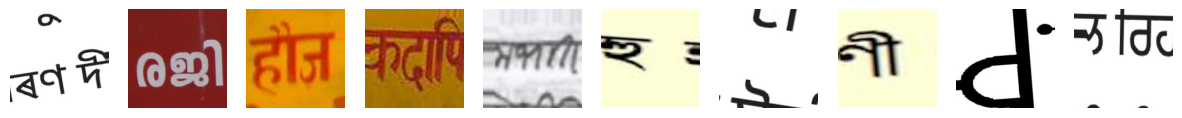

In [5]:
def plot_samples(generator, num_samples=10):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

# Plot some samples from the training set
plot_samples(train_generator)

In [6]:
from tensorflow.keras.applications import MobileNetV2, InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Concatenate, Input
from tensorflow.keras.models import Model


In [7]:
input_shape = (224, 224, 3)  # Assuming RGB images

# Load MobileNetV2
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in mobilenet_model.layers[:-5]:  # Freeze the first 100 layers
    layer.trainable = False

# Load InceptionResNetV2
inception_resnet_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in inception_resnet_model.layers[:-5]:  # Freeze the first 100 layers
    layer.trainable = False


In [8]:
# Define the input layer
input_layer = Input(shape=input_shape)

# Get the output of MobileNetV2
mobilenet_output = mobilenet_model(input_layer)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_output)

# Get the output of InceptionResNetV2
inception_resnet_output = inception_resnet_model(input_layer)
inception_resnet_output = GlobalAveragePooling2D()(inception_resnet_output)

# Concatenate the outputs
combined_output = Concatenate()([mobilenet_output, inception_resnet_output])


In [9]:
# Add a dense layer with dropout for regularization
x = Dense(512, activation='relu')(combined_output)
x = Dropout(0.5)(x)

# Output layer with softmax activation for classification
predictions = Dense(12, activation='softmax')(x)  # Assuming 12 classes for classification


In [10]:
# Create the model
model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=100  # Adjust epochs as needed
)

# Evaluate the model
test_loss, test_acc = model.evaluate(valid_generator, verbose=2)
print('Validation accuracy:', test_acc)


Epoch 1/100


c:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.6290 - loss: 1.2228 - val_accuracy: 0.2639 - val_loss: 12.8998
Epoch 2/100
  1/117 ━━━━━━━━━━━━━━━━━━━━ 2:32 1s/step - accuracy: 0.8438 - loss: 0.5735

c:\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8438 - loss: 0.5735 - val_accuracy: 0.2593 - val_loss: 10.5354
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8761 - loss: 0.4063 - val_accuracy: 0.3212 - val_loss: 13.1115
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7812 - loss: 0.6322 - val_accuracy: 0.2963 - val_loss: 9.5852
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9027 - loss: 0.3042 - val_accuracy: 0.4983 - val_loss: 8.7451
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9375 - loss: 0.1920 - val_accuracy: 0.4074 - val_loss: 9.8055
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8991 - loss: 0.3238 - val_accuracy: 0.1510 - val_loss: 29.7756
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9062 - loss: 0.2477 - val_accuracy: 0.1852 - val_loss: 35.3104
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9319 - loss: 0.1908 - val_accur

In [14]:
# Predictions and metrics
Y_pred = model.predict(valid_generator, valid_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step 


In [15]:
# Classification report
print('Classification Report')
target_names = list(valid_generator.class_indices.keys())
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Assamese       0.08      0.08      0.08        52
      Brahmi       0.20      0.21      0.20        87
  Devanagari       0.00      0.00      0.00        35
    Gujarati       0.07      0.11      0.08        28
     Kannada       0.04      0.03      0.04        62
   Malayalam       0.08      0.08      0.08        51
        Modi       0.02      0.02      0.02        53
        Odia       0.15      0.14      0.14        59
     Punjabi       0.00      0.00      0.00        15
       Tamil       0.10      0.10      0.10        80
      Telugu       0.40      0.03      0.06        62
        Urdu       0.03      0.21      0.06        19

    accuracy                           0.09       603
   macro avg       0.10      0.08      0.07       603
weighted avg       0.12      0.09      0.09       603



c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix


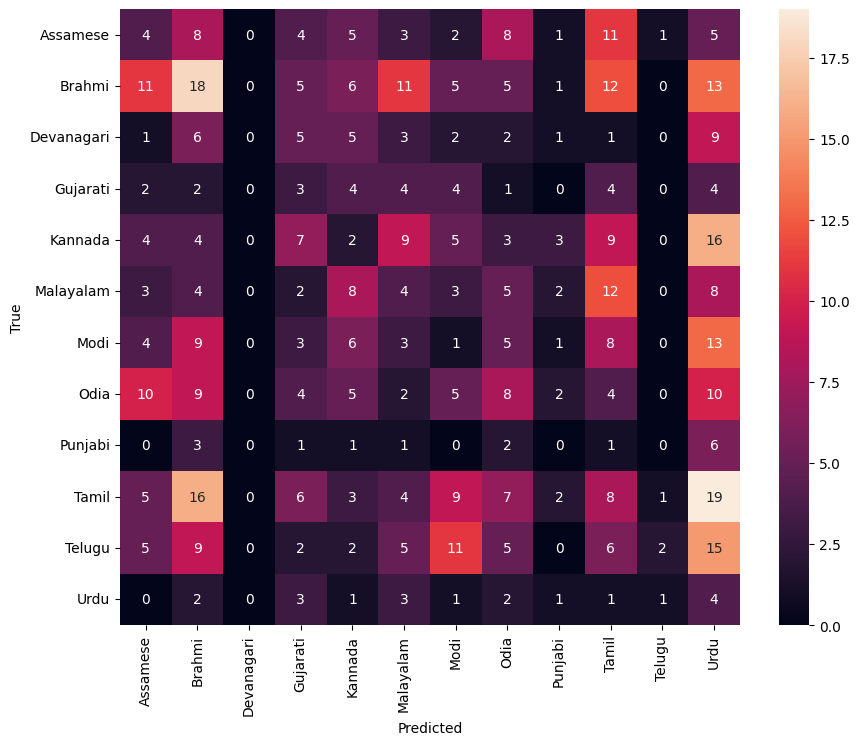

In [16]:
# Confusion Matrix
print('Confusion Matrix')
conf_matrix = confusion_matrix(valid_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

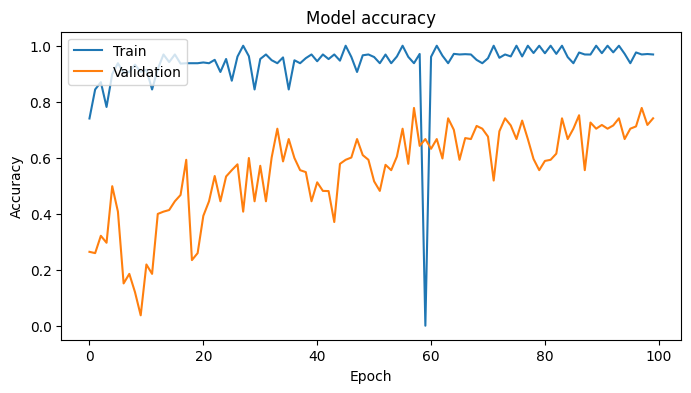

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

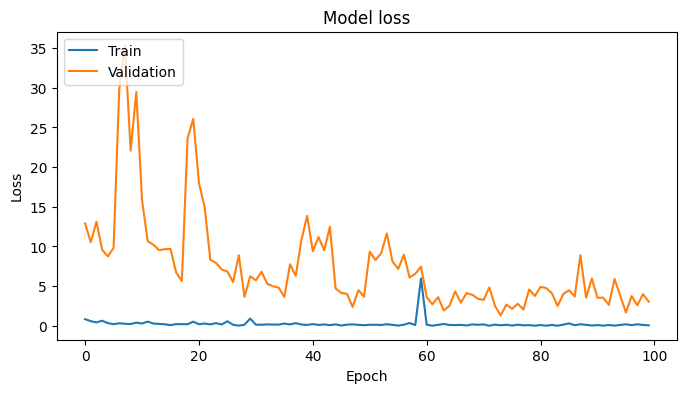

In [18]:
# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()